<a href="https://colab.research.google.com/github/RealMyeong/Aiffel_Exploration/blob/main/EX_BS2_project7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Step 1. 얼굴 검출 & 랜드마크 검출 하기


- 라이브러리 버전 확인

In [1]:
import cv2
import dlib
import matplotlib.pyplot as plt
import numpy as np
print(cv2.__version__)
print(dlib.__version__)

4.6.0
19.24.0


## Step 2. 스티커 적용 위치 확인하기


- 바른 자세 얼굴


- 이미지 읽어오고, RGB로 변환

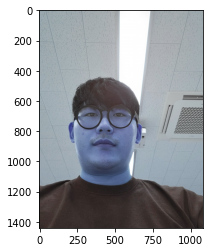

In [2]:
my_img_path = '/content/drive/MyDrive/AIFFEL/EX/7.카메라스티커/KakaoTalk_Photo_2022-08-09-11-22-11-001.png'
img_bgr = cv2.imread(my_img_path) #이미지 불러오기
img_show = img_bgr.copy()  #원본 이미지 보존하고 다른걸로 할당
plt.imshow(img_bgr)
plt.show()

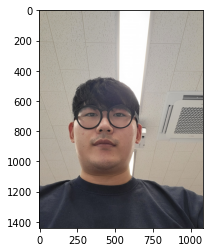

In [3]:
#RGB로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

In [4]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()

In [5]:
dlib_rects = detector_hog(img_rgb, 1)

rectangles[[(247, 590) (632, 975)]]


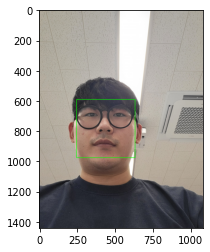

In [6]:
print(dlib_rects)

for dlib_rect in dlib_rects:
  l = dlib_rect.left()
  t = dlib_rect.top()
  r = dlib_rect.right()
  b = dlib_rect.bottom()

  cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

- 랜드마크 모델 불러옴

In [7]:
model_path = '/content/drive/MyDrive/AIFFEL/EX/7.카메라스티커/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)

In [8]:
list_landmarks = []

#얼굴 영역 박스마다 랜드마크를 찾아냄
for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb, dlib_rect)
  #face landmark 좌표 저장
  list_points = list(map(lambda p: (p.x, p.y), points.parts()))
  list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


- 영상에 랜드마크 표시 후 출력

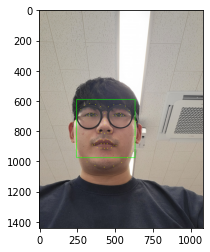

In [9]:
for landmark in list_landmarks:
  for point in landmark:
    cv2.circle(img_show, point, 2, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

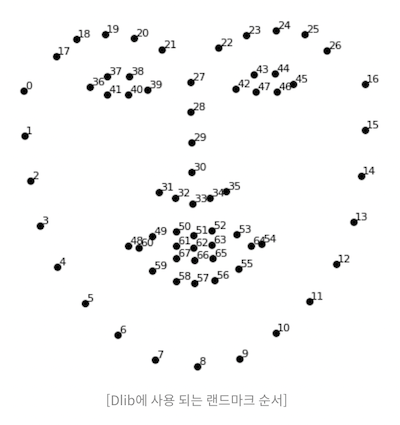

- 위 순서로 랜드마크가 찍혀있기 때문에 좌표 계산을 해줘야함

## Step 3. 스티커 적용하기

1. np.where 를 사용해서 스티커를 적용

2. opencv 의 cv2.addWeighted() 를 활용하여 스티커 뒤로 원본 이미지가 같이 보이도록 만들어 줌

- 랜드마크 좌표 확인

In [10]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[51]) # 윗 입술 중앙 좌표 인덱스
    x = landmark[51][0]
    y = landmark[51][1] - 51
    w = h = dlib_rect.width()
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(427, 860)
(x,y) : (427,809)
(w,h) : (386,386)


In [11]:
img_show_rgb.shape

(1440, 1080, 3)

- 스티커 이미지 불러오고 사이즈 확인

In [12]:
sticker_path = '/content/drive/MyDrive/AIFFEL/EX/7.카메라스티커/beard.png'
img_sticker = cv2.imread(sticker_path)
img_sticker.shape

(512, 512, 3)

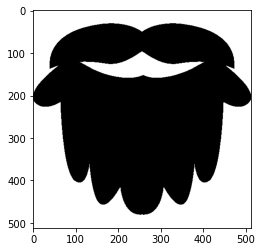

In [13]:
plt.imshow(img_sticker)
plt.show()

In [14]:
img_sticker = cv2.resize(img_sticker, (w,h))
print (img_sticker.shape)

(386, 386, 3)


- x,y 좌표 조정

In [15]:
refined_x = x - w // 2
refined_y = y
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (234,809)


좌표가 음수값이 안나왔기 때문에 원본 사진에서 벗어나는 부분이 없다고 봐도 될 듯 하다.

- 이미지에 스티커 추가

In [16]:
sticker_area = img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_show[refined_y:refined_y+img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)


In [17]:
sticker_area.shape

(386, 386, 3)

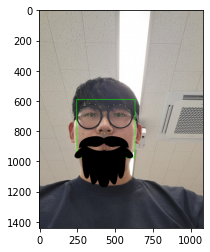

In [18]:
plt.imshow(cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB))
plt.show()

- 박스랑 랜드마크 없이 출력, 아까 보관해두었던 원본사진 이용

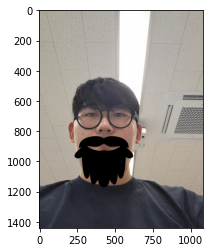

In [19]:
sticker_area = img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]]
img_bgr[refined_y:refined_y +img_sticker.shape[0], refined_x:refined_x+img_sticker.shape[1]] = \
    np.where(img_sticker!=0,sticker_area,img_sticker).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

- 기울어진 얼굴

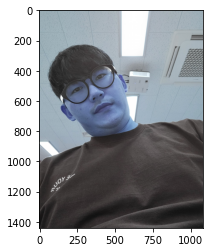

In [20]:
my_img_path = '/content/drive/MyDrive/AIFFEL/EX/7.카메라스티커/얼굴기울.png'
img_bgr = cv2.imread(my_img_path) #이미지 불러오기
img_show = img_bgr.copy()  #원본 이미지 보존하고 다른걸로 할당
plt.imshow(img_bgr)
plt.show()

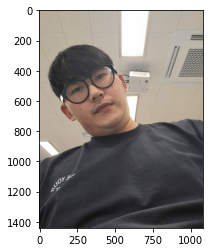

In [21]:
#RGB로 변환
img_rgb = cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB)
plt.imshow(img_rgb)
plt.show()

rectangles[[(142, 348) (605, 811)]]


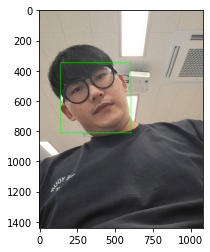

In [22]:
#detector 선언
detector_hog = dlib.get_frontal_face_detector()
dlib_rects = detector_hog(img_rgb, 1)
print(dlib_rects)

for dlib_rect in dlib_rects:
  l = dlib_rect.left()
  t = dlib_rect.top()
  r = dlib_rect.right()
  b = dlib_rect.bottom()

  cv2.rectangle(img_show, (l,t), (r,b), (0,255,0), 2, lineType=cv2.LINE_AA)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [23]:
model_path = '/content/drive/MyDrive/AIFFEL/EX/7.카메라스티커/shape_predictor_68_face_landmarks.dat'
landmark_predictor = dlib.shape_predictor(model_path)


list_landmarks = []

#얼굴 영역 박스마다 랜드마크를 찾아냄
for dlib_rect in dlib_rects:
  points = landmark_predictor(img_rgb, dlib_rect)
  #face landmark 좌표 저장
  list_points = list(map(lambda p: (p.x, p.y), points.parts()))
  list_landmarks.append(list_points)

print(len(list_landmarks[0]))

68


In [24]:
img_show_rgb[1,2]

array([181, 170, 150], dtype=uint8)

In [25]:
img_show_rgb.shape

(1440, 1080, 3)

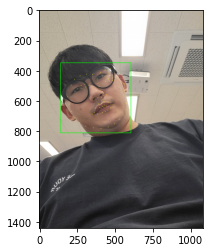

In [26]:
for landmark in list_landmarks:
  for point in landmark:
    cv2.circle(img_show, point, 2, (0,255,255), -1)

img_show_rgb = cv2.cvtColor(img_show, cv2.COLOR_BGR2RGB)
plt.imshow(img_show_rgb)
plt.show()

In [27]:
for dlib_rect, landmark in zip(dlib_rects, list_landmarks):
    print (landmark[51]) # 윗 입술 중앙 좌표 인덱스
    x = landmark[51][0]
    y = landmark[51][1]
    x2 = landmark[57][0]
    y2 = landmark[57][1]
    w = h = dlib_rect.width()
    print('(x2,y2) : (%d,%d)'%(x2,y2))
    print ('(x,y) : (%d,%d)'%(x,y))
    print ('(w,h) : (%d,%d)'%(w,h))

(412, 617)
(x2,y2) : (436,669)
(x,y) : (412,617)
(w,h) : (464,464)


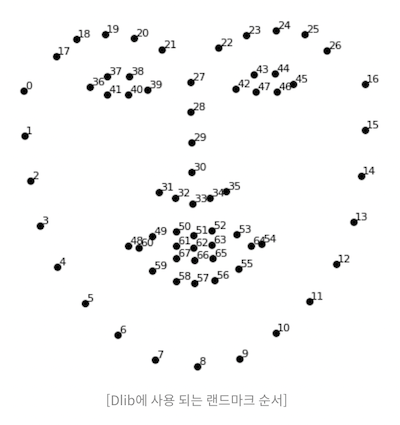

- 원본 이미지

- 회전한 스티커

In [28]:
sticker_path2 = '/content/drive/MyDrive/AIFFEL/EX/7.카메라스티커/beard2.png'
img_sticker2 = cv2.imread(sticker_path2)
img_sticker2.shape

(512, 512, 3)

In [29]:
height, width, channel = img_sticker.shape
matrix = cv2.getRotationMatrix2D((width/2, height/2), 25, 1)
dst = cv2.warpAffine(img_sticker, matrix, (width, height))

In [30]:
dst = cv2.resize(dst, (w,h))
print (dst.shape)

(464, 464, 3)


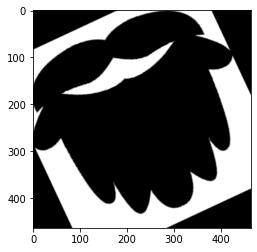

In [31]:
plt.imshow(dst)
plt.show()

In [32]:
refined_x = 257
refined_y = 554
print ('(x,y) : (%d,%d)'%(refined_x, refined_y))

(x,y) : (257,554)


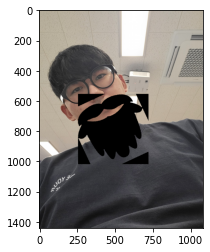

In [33]:
sticker_area = img_bgr[refined_y:refined_y +dst.shape[0], refined_x:refined_x+dst.shape[1]]
img_bgr[refined_y:refined_y +dst.shape[0], refined_x:refined_x+dst.shape[1]] = \
    np.where(dst!=0,sticker_area,dst).astype(np.uint8)
plt.imshow(cv2.cvtColor(img_bgr, cv2.COLOR_BGR2RGB))
plt.show()

## Step 4. 문제점 찾아보기




- 얼굴 각도에 따라 스티커가 어떻게 변해야할까요?
- 멀리서 촬영하면 왜 안될까요? 옆으로 누워서 촬영하면 왜 안될까요? 
  - 멀리서 촬영하면 박스가 작아지고 랜드마크가 거의 겹치게 돼서 좌표 설정이 좀 힘들어 질 것 같다.
- 실행 속도가 중요할까요?
- 스티커앱을 만들 때 정확도가 얼마나 중요할까요?

## 회고

이번 익스를 진행하면서 처음에 그냥 노드 따라 하니까 그냥 정자세로 찍은 사진은 잘 진행됐다. 그래서 이거 너무 쉬운거 아닌가..?? 하고 그만 두려는 찰나 문제점 찾아보기 파트에서 얼굴 각도에 따라 스티커가 어떻게 변해야하는지 생각해보는 부분이 있었다.

- 1 Try

처음엔 얼굴 각도에 따라 달라진다면 그냥 회전변환 해서 이 전에 하던거랑 똑같이 붙이기만 하면 되는거 아닌가?? 라는 생각에 금방 끝나겠지~~ 하면서 시작했다. 일단 먼저 회전 축을 정해야 하는데 랜드마크 부분에서 윗입술 정 가운데 있는 랜드마크(51번)이랑 아랫입술 정 가운데 있는 랜드마크(57)번을 지나는 직선을 축으로 해서 회전 각을 구하면 될거라 생각했다. 근데 처음에는 원점 기준으로 각도를 구해서 영 이상하게 나왔다. 우리가 스티커를 붙일때 픽셀 시작점(왼쪽 상단)에 붙이는 게 아니라 이미지 중간에 붙이는거기 때문에 원점 기준으로 회전을 하면 안된다. 

- 2 Try

원점을 기준으로 회전하면 안되기때문에 회전의 중심이 되는 점을 다시 찾아야 하는데 그 점은 우리가 붙이려고 하는 스티커 이미지의 정 중앙점을 선택했다. 그렇게 각도를 다시 구하고 처음엔 이 각도를 이용하여 스티커의 모든 픽셀 좌표들을 회전변환 행렬로 계산해서 넣어보려고 했는데 도저히 머리가 아파서 그건 못해보고 cv2.getRotationMatrix2D를 이용해서 회전시켰다. 그렇게 뽑아보니 스티커가 돌아가긴 했는데 각이 틀어지다 보니까 모서리 부분에 원래 없던 공간이 생기고 거기를 자동으로 검은색으로 채우면서 온전히 스티커만 남지 않게 되었다... 결국 실패하긴 했지만 오랜만에 계산도 하고 좌표 구하고 하다보니까 좀 재밌었다.. ㅎㅎ

글로만 쓰면 했는지 안했는지 모르실수도 있으니 실제로 계산했던 파일을 올리겠습니다...좀 더럽지만 이정도로 노력했구나~ 해주십쇼 

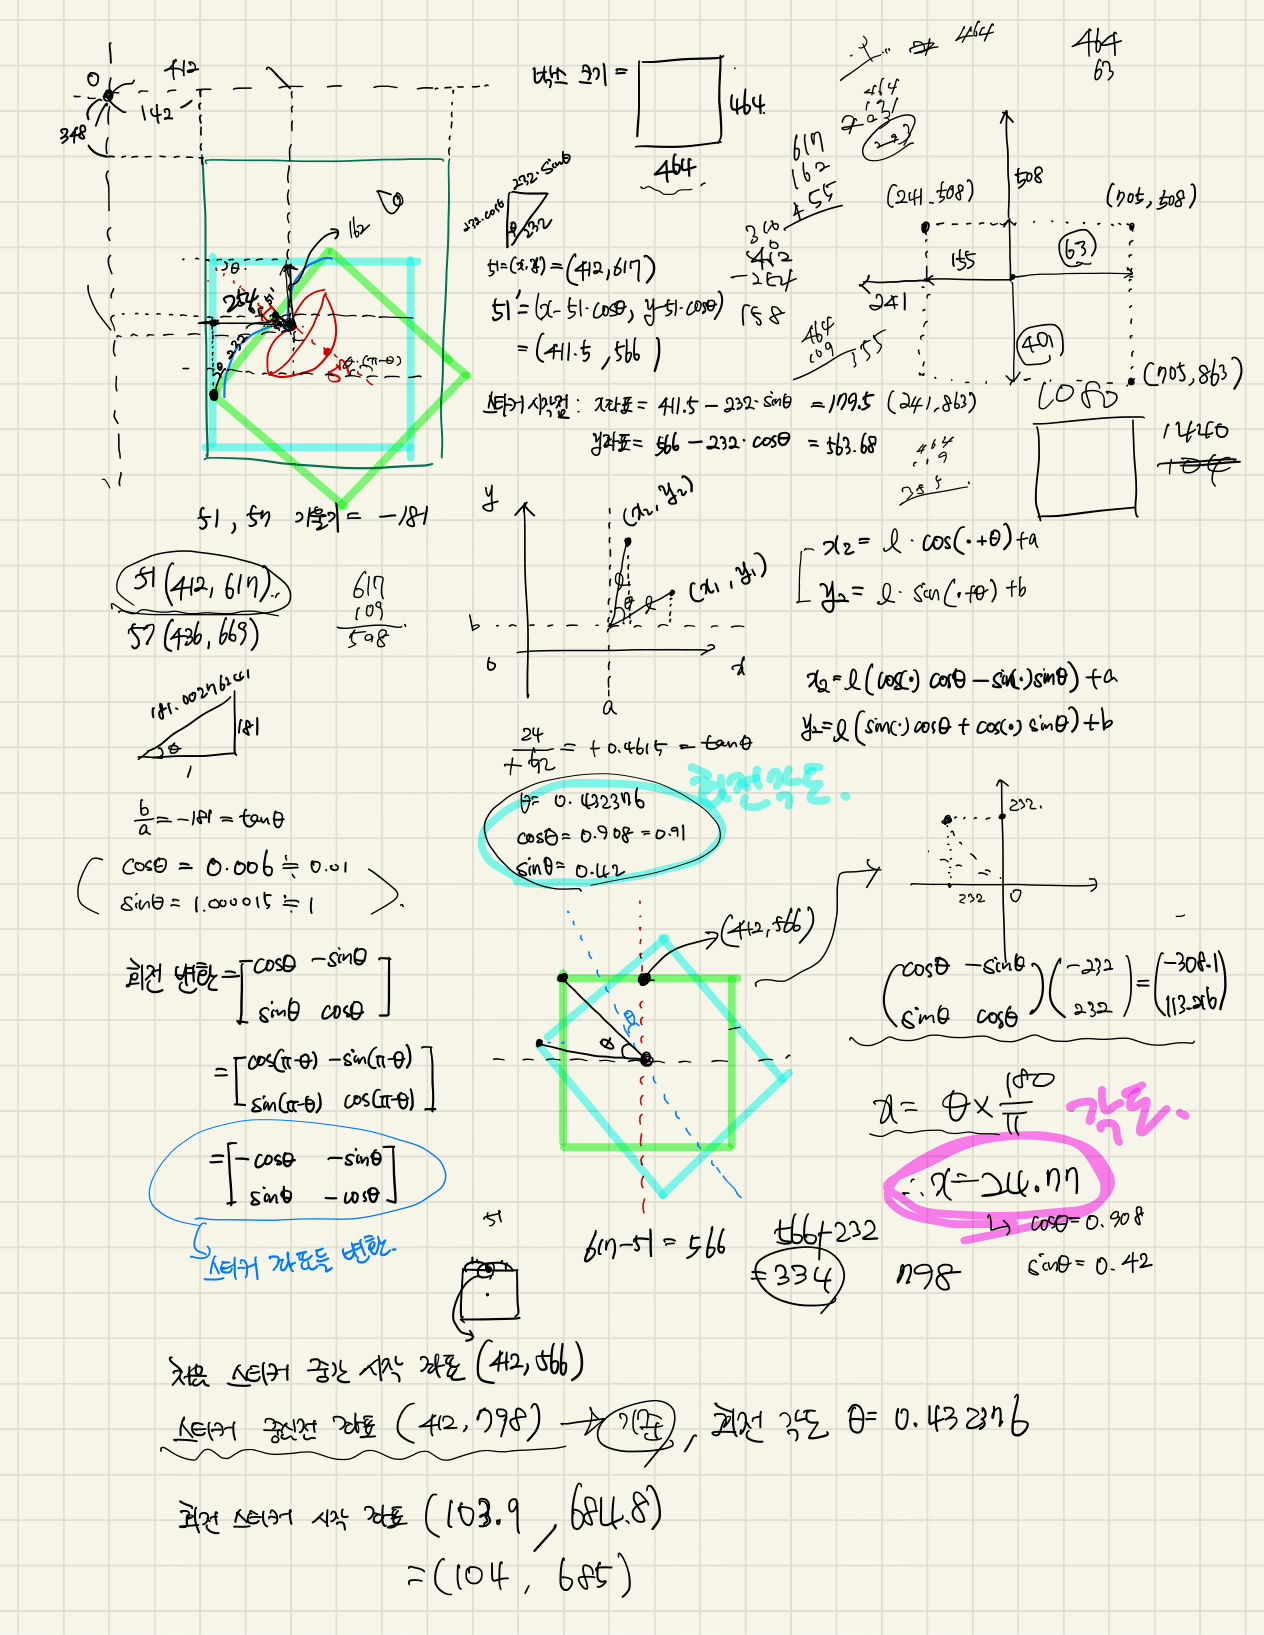